In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,List

In [3]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operator1: str
    operator2: str
    result: str

In [ ]:
def add_node1(state:AgentState) -> AgentState:
    state['result'] = f"there is add_node1 and result is {state['number1']} + {state['number2']} operator is {state['operator1']}"
    return state

def add_node2(state:AgentState) -> AgentState:
    state['result'] = state['result'] + f"there is add_node2 and result is {state['number3']} + {state['number4']} operator is {state['operator2']}"
    return state

def sub_node1(state:AgentState) -> AgentState:
    state['result'] = state['result'] + f"there is sub_node1 and result is {state['number1']} - {state['number2']} operator is {state['operator1']}"
    return state

def sub_node2(state:AgentState) -> AgentState:
    state['result'] = state['result'] + f"there is sub_node2 and result is {state['number3']} - {state['number4']} operator is {state['operator2']}"
    return state

def router1(state:AgentState) -> str:
    if state['operator1'] == "+":
        return "add_node1"
    elif state['operator1'] == "-":
        return "sub_node1"
    else:
        return "please input + or -"

def router2(state:AgentState) -> str:
    if state['operator2'] == "+":
        return "add_node2"
    elif state['operator2'] == "-":
        return "sub_node2"
    else:
        return "please input + or -"
    

In [21]:
graph = StateGraph(AgentState)
graph.add_node("add_node1", add_node1)
graph.add_node("add_node2", add_node2)
graph.add_node("sub_node1", sub_node1)
graph.add_node("sub_node2", sub_node2)
graph.add_node("router1", lambda state:state)
graph.add_node("router2", lambda state:state)
graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    router1,
    {
        "add_node1": "add_node1",
        "sub_node1": "sub_node1"
    }
)
graph.add_edge("add_node1", "router2")
graph.add_edge("sub_node1", "router2")
graph.add_conditional_edges(
    "router2",
    router2,
    {
        "add_node2": "add_node2",
        "sub_node2": "sub_node2"
    }
)
graph.add_edge("add_node2", END)
graph.add_edge("sub_node2", END)
app = graph.compile()

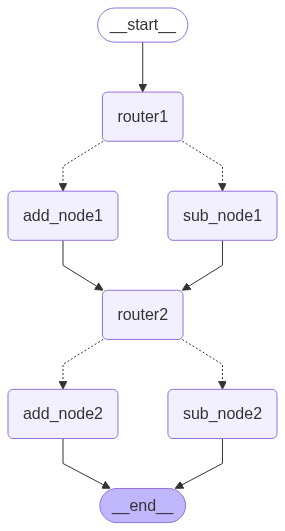

In [22]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
require = app.invoke({"number1":10,"number2":5,"operator1":"+","number3":7,"number4":5,"operator2":"-"})
print(require)


{'number1': 10, 'number2': 5, 'number3': 7, 'number4': 5, 'operator1': '+', 'operator2': '-', 'result': 'there is add_node1 and result is 10 + 5 operator is +there is sub_node2 and result is 7 - 5 operator is -'}
